In [3]:
import feedparser

In [30]:
def fetch_blog_entries():
    entries = feedparser.parse("https://medium.com/feed/@neverforget-1975")["entries"]
    return [
        {
            "title": entry["title"],
            "url": entry["link"].split("?")[0],
            "published": entry["published"],
        }
        for entry in entries
    ]


In [31]:
blog_entries = fetch_blog_entries()

In [32]:
blog_entries

[{'title': 'The Ultimate Guide to Design Patterns in Software Engineering',
  'url': 'https://neverforget-1975.medium.com/the-ultimate-guide-to-design-patterns-in-software-engineering-a7e2d28ce907',
  'published': 'Wed, 30 Aug 2023 07:32:26 GMT'},
 {'title': 'Exploring Bhattacharyya Distance',
  'url': 'https://medium.com/the-modern-scientist/exploring-bhattacharyya-distance-a31822f94c34',
  'published': 'Thu, 24 Aug 2023 09:47:23 GMT'},
 {'title': 'Mastering Python: A Deep Dive into Coding Best Practices',
  'url': 'https://tutorials.botsfloor.com/mastering-python-a-deep-dive-into-coding-best-practices-de8ee4cf2249',
  'published': 'Wed, 23 Aug 2023 01:26:51 GMT'},
 {'title': 'Integrating C Functions with Python using the C API',
  'url': 'https://neverforget-1975.medium.com/integrating-c-functions-with-python-using-the-c-api-a74829c1bbc8',
  'published': 'Tue, 22 Aug 2023 21:32:21 GMT'},
 {'title': 'Understanding and Utilizing Doctest in Python',
  'url': 'https://medium.com/data-sci

In [35]:
def extract_date_substring(input_str):
    """Extracts the required date portion from a date-time string.
    
    Parameters:
        input_str (str): The date-time string in 'Day, DD Month YYYY HH:MM:SS GMT' format.
        
    Returns:
        str: Extracted date string in 'Day, DD Month YYYY' format.
    """
    # Split the string by space and rejoin the first 4 components
    return ' '.join(input_str.split()[:4])

# Test Case
assert extract_date_substring('Tue, 22 Aug 2023 07:42:21 GMT') == 'Tue, 22 Aug 2023'

In [36]:
for entrie in blog_entries:
    entrie["published"] = extract_date_substring(entrie["published"])

In [37]:
blog_entries

[{'title': 'The Ultimate Guide to Design Patterns in Software Engineering',
  'url': 'https://neverforget-1975.medium.com/the-ultimate-guide-to-design-patterns-in-software-engineering-a7e2d28ce907',
  'published': 'Wed, 30 Aug 2023'},
 {'title': 'Exploring Bhattacharyya Distance',
  'url': 'https://medium.com/the-modern-scientist/exploring-bhattacharyya-distance-a31822f94c34',
  'published': 'Thu, 24 Aug 2023'},
 {'title': 'Mastering Python: A Deep Dive into Coding Best Practices',
  'url': 'https://tutorials.botsfloor.com/mastering-python-a-deep-dive-into-coding-best-practices-de8ee4cf2249',
  'published': 'Wed, 23 Aug 2023'},
 {'title': 'Integrating C Functions with Python using the C API',
  'url': 'https://neverforget-1975.medium.com/integrating-c-functions-with-python-using-the-c-api-a74829c1bbc8',
  'published': 'Tue, 22 Aug 2023'},
 {'title': 'Understanding and Utilizing Doctest in Python',
  'url': 'https://medium.com/data-science-dev/understanding-and-utilizing-doctest-in-pyth

In [33]:
import re

def replace_chunk(content, marker, chunk, inline=False):
    """Replace a section of content identified by marker comments.
    
    Parameters:
        content (str): Original content.
        marker (str): Marker identifying the section to replace.
        chunk (str): New content to insert between markers.
        inline (bool): Whether the chunk should be inline or not.
    
    Returns:
        str: Modified content.
    """
    pattern = r"<!\-\- {} starts \-\->.*<!\-\- {} ends \-\->".format(marker, marker)
    r = re.compile(pattern, re.DOTALL)

    if not inline:
        chunk = "\n{}\n".format(chunk)
    replacement = "<!-- {} starts -->{}<!-- {} ends -->".format(marker, chunk, marker)

    if r.search(content):
        # If the marker is found, replace it
        return r.sub(replacement, content)
    else:
        # If the marker is not found, append the chunk at the end
        return content + replacement

# Test cases
original_content = """# My README
<!-- blog starts -->
Old blog posts here.
<!-- blog ends -->

## Other section
More text.
"""

new_chunk = """New blog post 1
New blog post 2"""

updated_content = replace_chunk(original_content, "blog", new_chunk)
print(updated_content)


# My README
<!-- blog starts -->
New blog post 1
New blog post 2
<!-- blog ends -->

## Other section
More text.



In [34]:
import re

def replace_chunk(content, marker, chunk, inline=False):
    """Replace a section of content identified by marker comments.
    
    Parameters:
        content (str): Original content.
        marker (str): Marker identifying the section to replace.
        chunk (str): New content to insert between markers.
        inline (bool): Whether the chunk should be inline or not.
    
    Returns:
        str: Modified content.
    """
    pattern = r"<!\-\- {} starts \-\->.*<!\-\- {} ends \-\->".format(marker, marker)
    r = re.compile(pattern, re.DOTALL)

    if not inline:
        chunk = "\n{}\n".format(chunk)

    replacement = "<!-- {} starts -->{}<!-- {} ends -->".format(marker, chunk, marker)
    
    # Debugging: Count occurrences of the marker
    occurrences = len(r.findall(content))
    print(f"Number of occurrences of marker {marker}: {occurrences}")

    if occurrences == 1:
        # If the marker is found once, replace it
        return r.sub(replacement, content)
    elif occurrences == 0:
        # If the marker is not found, append the chunk at the end
        return content + "\n" + replacement
    else:
        # If multiple markers exist, it's an issue.
        print(f"Multiple markers found for {marker}. Please resolve this manually.")
        return content

# Test cases
original_content = """# My README
<!-- blog starts -->
Old blog posts here.
<!-- blog ends -->

## Other section
More text.
"""

new_chunk = """New blog post 1
New blog post 2"""

updated_content = replace_chunk(original_content, "blog", new_chunk)
print("Updated Content:")
print(updated_content)


Number of occurrences of marker blog: 1
Updated Content:
# My README
<!-- blog starts -->
New blog post 1
New blog post 2
<!-- blog ends -->

## Other section
More text.



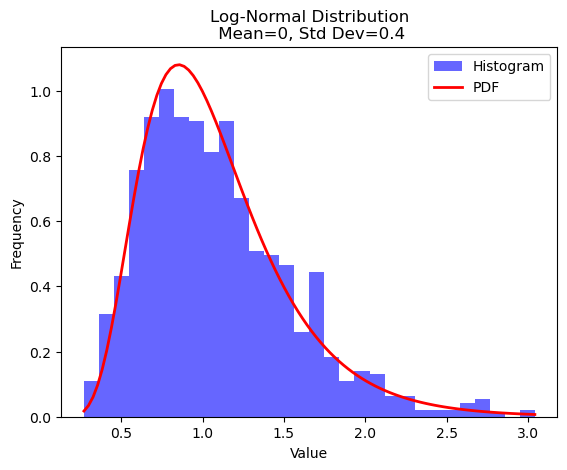

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

def plot_log_normal_distribution(mean, std_dev, filename, size=1000):
    """
    Plots a Log-Normal Distribution using given mean and standard deviation.
    
    Parameters:
        mean (float): The mean of the log-normal distribution.
        std_dev (float): The standard deviation of the log-normal distribution.
        size (int): The number of random samples to generate.
    
    Returns:
        None
    
    Examples:
        >>> plot_log_normal_distribution(0, 0.4)
        >>> plot_log_normal_distribution(0.5, 0.2)
    """
    
    # Generate data points for the log-normal distribution
    data = np.random.lognormal(mean, std_dev, size)
    
    # Generate x-axis values for the PDF
    x = np.linspace(min(data), max(data), 100)
    
    # Compute PDF values
    pdf_values = lognorm.pdf(x, std_dev, scale=np.exp(mean))
    
    # Plot the histogram of the generated data
    plt.hist(data, bins=30, density=True, alpha=0.6, color='b', label='Histogram')
    
    # Plot the PDF of the log-normal distribution
    plt.plot(x, pdf_values, linewidth=2, color='r', label='PDF')
    
    plt.title(f'Log-Normal Distribution\n Mean={mean}, Std Dev={std_dev}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    # Save the plot as a PNG file
    plt.savefig(filename)
    plt.show()

# Test the function
if __name__ == "__main__":
    plot_log_normal_distribution(0, 0.4, "log_normal.png")


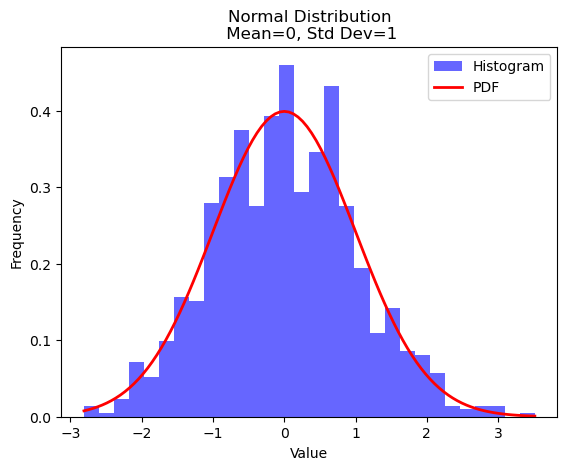

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_normal_distribution(mean, std_dev, filename, size=1000):
    """
    Plots a Normal Distribution with a given mean and standard deviation.
    
    Parameters:
        mean (float): The mean of the normal distribution.
        std_dev (float): The standard deviation of the normal distribution.
        filename (str): The name of the file where the plot will be saved.
        size (int): The number of random samples to generate.
        
    Returns:
        None
    
    Examples:
        >>> plot_normal_distribution(0, 1, "normal_distribution.png")
        >>> plot_normal_distribution(5, 2, "normal_distribution_5_2.png")
    """
    
    # Generate data points for the normal distribution
    data = np.random.normal(mean, std_dev, size)
    
    # Generate x-axis values for the PDF
    x = np.linspace(min(data), max(data), 100)
    
    # Compute PDF values
    pdf_values = norm.pdf(x, mean, std_dev)
    
    # Plot the histogram of the generated data
    plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
    
    # Plot the PDF of the normal distribution
    plt.plot(x, pdf_values, linewidth=2, color='r', label='PDF')
    
    plt.title(f'Normal Distribution\n Mean={mean}, Std Dev={std_dev}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    
    # Save the plot as a PNG file
    plt.savefig(filename)
    
    plt.show()

# Test the function
if __name__ == "__main__":
    plot_normal_distribution(0, 1, "normal_distribution.png")


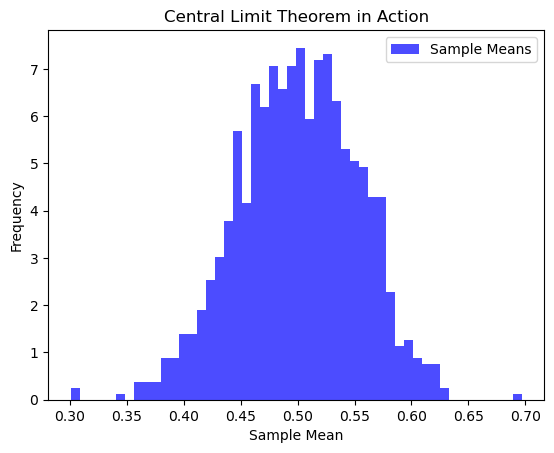

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def central_limit_theorem_demo(sample_size: int, num_samples: int, num_bins: int, filename: str) -> None:
    """
    Demonstrates the Central Limit Theorem by averaging samples from a uniform distribution.
    
    Parameters:
        sample_size (int): The size of each sample.
        num_samples (int): The number of samples to average.
        num_bins (int): The number of bins for the histogram.
        filename (str): The name of the file where the plot will be saved.
        
    Returns:
        None
    
    Examples:
        >>> central_limit_theorem_demo(30, 1000, 50, "central_limit_demo.png")
    """
    
    # Generate a large number of samples from a uniform distribution between 0 and 1
    samples = np.random.uniform(0, 1, (num_samples, sample_size))
    
    # Compute the means of these samples
    sample_means = np.mean(samples, axis=1)
    
    # Plotting the histogram of the sample means
    plt.hist(sample_means, bins=num_bins, density=True, color='b', alpha=0.7, label='Sample Means')
    
    plt.title('Central Limit Theorem in Action')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.legend()
    
    # Save the plot as a PNG file
    plt.savefig(filename)
    
    plt.show()

# Test the function
if __name__ == "__main__":
    central_limit_theorem_demo(30, 1000, 50, "central_limit_demo.png")


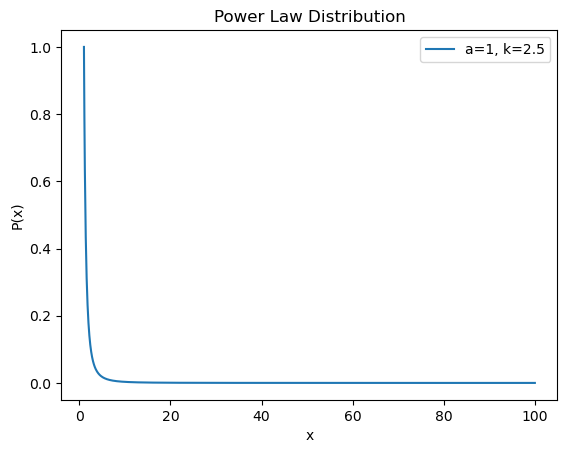

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def plot_power_law(a: float, k: float, x_min: float, x_max: float, num_points: int, filename: str) -> None:
    """
    Plots the Power Law Distribution P(x) = ax^{-k}.
    
    Parameters:
        a (float): Constant a in the equation P(x) = ax^{-k}.
        k (float): Exponent k in the equation P(x) = ax^{-k}.
        x_min (float): Minimum value of x for the plot.
        x_max (float): Maximum value of x for the plot.
        num_points (int): Number of points to plot.
        filename (str): The name of the file where the plot will be saved.
    
    Returns:
        None
    
    Example:
        >>> plot_power_law(1, 2.5, 1, 100, 1000, "power_law_plot.png")
    """
    
    # Generate x-values
    x_values = np.linspace(x_min, x_max, num_points)
    
    # Calculate y-values based on the Power Law equation
    y_values = a * (x_values ** -k)
    
    # Plotting
    plt.plot(x_values, y_values, label=f'a={a}, k={k}')
    plt.xlabel('x')
    plt.ylabel('P(x)')
    plt.title('Power Law Distribution')
    plt.legend()
    
    # Save the plot
    plt.savefig(filename)
    
    plt.show()

# Test the function
if __name__ == "__main__":
    plot_power_law(1, 2.5, 1, 100, 1000, "power_law_plot.png")


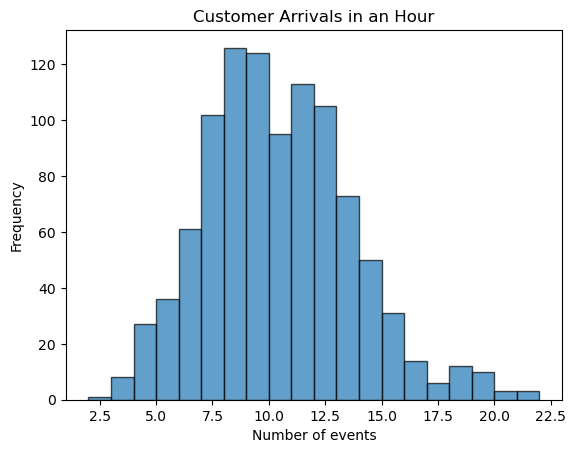

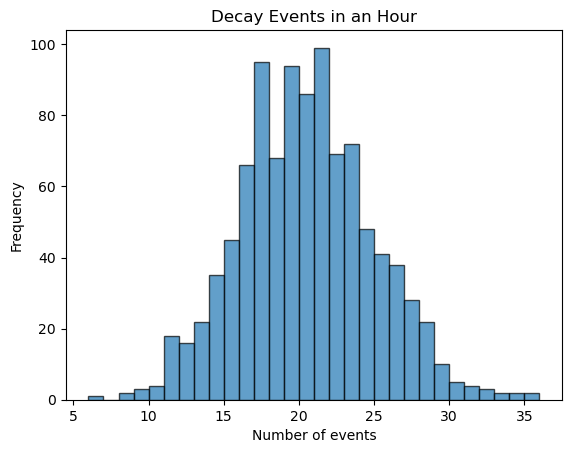

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_poisson_process(lambda_value, time_interval, num_simulations):
    """
    Simulate a Poisson process.
    
    Parameters:
    lambda_value (float): Average rate of event occurrence per time interval.
    time_interval (int): Time interval for the simulation.
    num_simulations (int): Number of simulations to perform.
    
    Returns:
    list: List of counts of occurrences in each simulation.
    """
    # Generate Poisson-distributed data
    occurrences = np.random.poisson(lambda_value, num_simulations)
    
    return occurrences

def plot_histogram(data, title, filename):
    """
    Plot histogram for the given data.
    
    Parameters:
    data (list): List of counts of occurrences in each simulation.
    title (str): Title for the plot.
    
    Returns:
    None
    """
    plt.hist(data, bins=range(min(data), max(data) + 1), alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel("Number of events")
    plt.ylabel("Frequency")
    plt.savefig(filename)
    plt.show()

# Number of customer arrivals at a shop in an hour (let's assume an average of 10 customers/hour)
lambda_customers = 10
# Time interval (1 hour)
time_interval = 1
# Number of simulations
num_simulations = 1000

customer_arrivals = simulate_poisson_process(lambda_customers, time_interval, num_simulations)
plot_histogram(customer_arrivals, "Customer Arrivals in an Hour", "customer_arrivals.png")

# Number of decay events from a radioactive source in an hour (let's assume an average of 20 events/hour)
lambda_decay = 20

decay_events = simulate_poisson_process(lambda_decay, time_interval, num_simulations)
plot_histogram(decay_events, "Decay Events in an Hour", "decay_events.png")
